In [1]:
# imports, run before any other cell
import pandas as pd
import matplotlib.pyplot as plt
import json
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np

# Homogeneous agent baseline

Results can be found in the CyMARL-CommFormer/baseline_results/phase2_confidentiality_small folder.

In [2]:
# Load the CSV file
csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\phase2_confidentiality_small\run-average_episode_rewards_average_episode_rewards-tag-average_episode_rewards.csv"
df_avg_rewards = pd.read_csv(csv_path)

df_avg_rewards.drop(columns=['Wall time'], inplace=True)

# Display the last few rows to verify
print(df_avg_rewards.tail())

          Step     Value
1384  19931040 -8.193749
1385  19945440 -7.985416
1386  19959840 -5.789583
1387  19974240 -7.889583
1388  19988640 -5.379166


In [3]:
# Load the CSV file
csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\phase2_confidentiality_small\run-eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards.csv"
df_eval_avg_rewards = pd.read_csv(csv_path)

df_eval_avg_rewards.drop(columns=['Wall time'], inplace=True)

# Display the last few rows to verify
print(df_eval_avg_rewards.tail())

          Step      Value
1384  19931040 -12.049999
1385  19945440  -6.900000
1386  19959840  -5.200000
1387  19974240  -4.650000
1388  19988640  -4.200000


In [4]:
# Load the CSV file
csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\DIAL_phase2_confidentiality_small\4_confidentiality_small_with_block_limit_analyse.csv"
df_faizan_confidentiality_small = pd.read_csv(csv_path)

df_faizan_confidentiality_small.drop(df_faizan_confidentiality_small.columns[0], axis=1, inplace=True)

df_faizan_confidentiality_small['Train_Step'] = df_faizan_confidentiality_small['Train_Episode'] * 64 * 30

# Smooth the data by grouping into 1000 bins and taking the mean
df_faizan_confidentiality_small = (
    df_faizan_confidentiality_small
    .groupby(
        pd.cut(
            df_faizan_confidentiality_small.index,
            bins=1389,
            labels=False
        )
    )
    .mean(numeric_only=True)
    .reset_index(drop=True)
)

# Display the last few rows to verify
print(df_faizan_confidentiality_small.tail())

      Train_Episode  Train_Reward  Train_Step
1384        10017.5     -4.561621  19233600.0
1385        10025.0     -3.490178  19248000.0
1386        10032.0     -4.406920  19261440.0
1387        10039.0     -3.742969  19274880.0
1388        10046.5     -4.466113  19289280.0


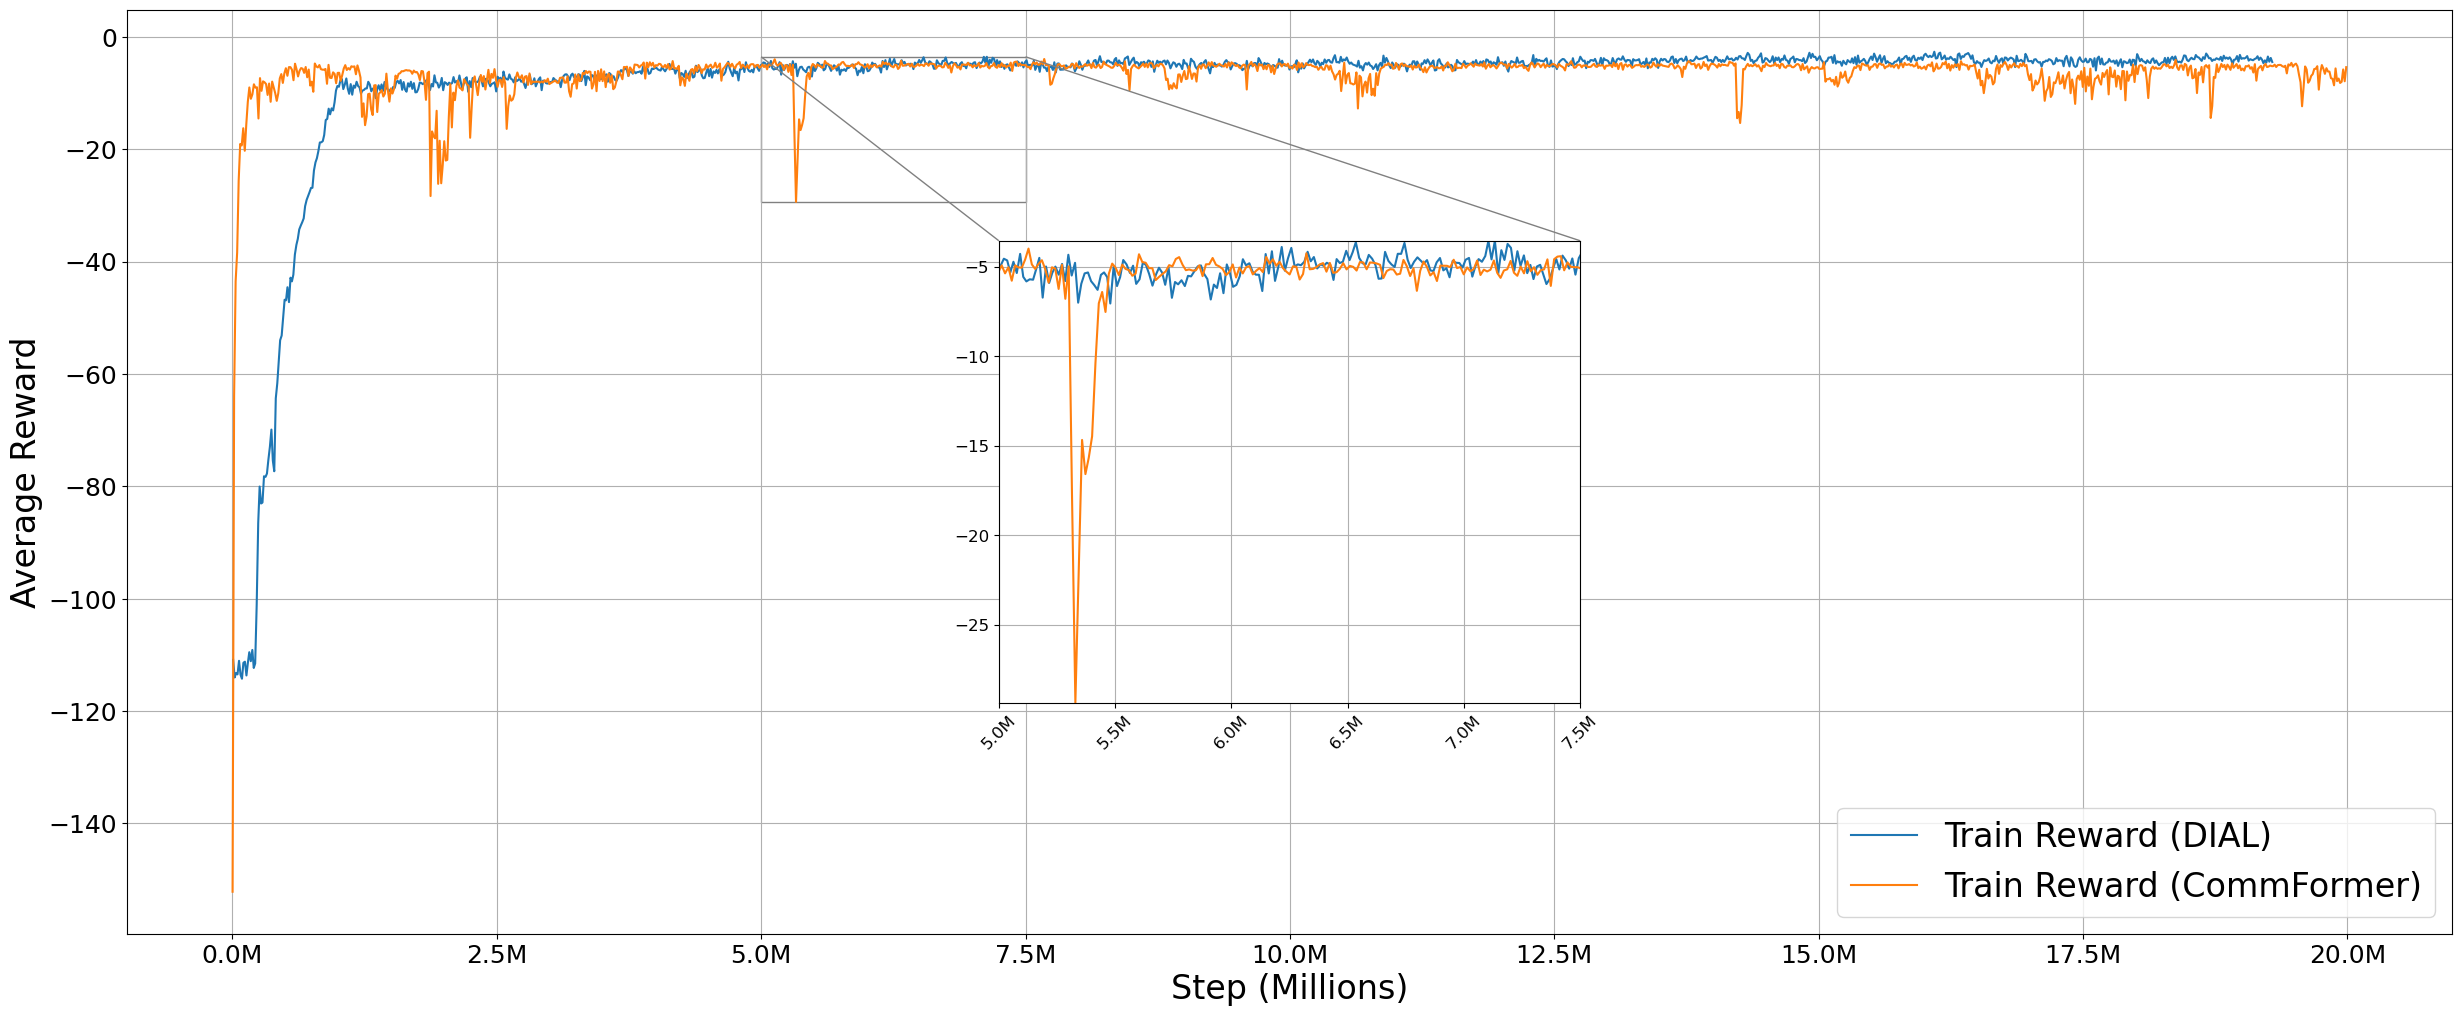

In [30]:
formatter = FuncFormatter(lambda x, _: f'{x:.1f}M')

# Plot the average mean value per step from df_avg_rewards and df_faizan_confidentiality_small
plt.figure(figsize=(30, 12))
plt.plot(df_faizan_confidentiality_small['Train_Step'].to_numpy() / 1e6, df_faizan_confidentiality_small['Train_Reward'].to_numpy(), label='Train Reward (DIAL)')
plt.plot(df_avg_rewards['Step'].to_numpy() / 1e6, df_avg_rewards['Value'].to_numpy(), label='Train Reward (CommFormer)')
plt.xlabel('Step (Millions)', fontsize=24)
plt.ylabel('Average Reward', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title('Average Reward per Step')
plt.grid(True)
plt.legend(fontsize=24)

# Format x-axis ticks to show 'M'
plt.gca().xaxis.set_major_formatter(formatter)

# Add zoom box for data from 7.5M to 10M steps
ax = plt.gca()
axins = inset_axes(ax, width="25%", height="50%", loc='center', borderpad=2)

# Plot the same data in the inset
axins.plot(df_faizan_confidentiality_small['Train_Step'].to_numpy() / 1e6, df_faizan_confidentiality_small['Train_Reward'].to_numpy(), label='Train Reward (DIAL)')
axins.plot(df_avg_rewards['Step'].to_numpy() / 1e6, df_avg_rewards['Value'].to_numpy(), label='Train Reward (CommFormer)')

# Set xlim and ylim for the zoomed region
x1, x2 = 5, 7.5
axins.set_xlim(x1, x2)

# Calculate min/max y in the zoomed region for both datasets
y1 = min(
    df_faizan_confidentiality_small[(df_faizan_confidentiality_small['Train_Step'] >= x1 * 1e6) & (df_faizan_confidentiality_small['Train_Step'] <= x2 * 1e6)]['Train_Reward'].min(),
    df_avg_rewards[(df_avg_rewards['Step'] >= x1 * 1e6) & (df_avg_rewards['Step'] <= x2 * 1e6)]['Value'].min()
)
y2 = max(
    df_faizan_confidentiality_small[(df_faizan_confidentiality_small['Train_Step'] >= x1 * 1e6) & (df_faizan_confidentiality_small['Train_Step'] <= x2 * 1e6)]['Train_Reward'].max(),
    df_avg_rewards[(df_avg_rewards['Step'] >= x1 * 1e6) & (df_avg_rewards['Step'] <= x2 * 1e6)]['Value'].max()
)
axins.set_ylim(y1, y2)

axins.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Draw lines indicating the area of the zoom
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

plt.show()

In [17]:
mean_reward = []
std_error_reward = []

mean_reward.append(df_avg_rewards['Value'].mean())
std_error_reward.append(df_avg_rewards['Value'].std() / (len(df_avg_rewards) ** 0.5))

mean_reward.append(df_eval_avg_rewards['Value'].mean())
std_error_reward.append(df_eval_avg_rewards['Value'].std() / (len(df_eval_avg_rewards) ** 0.5))

faizan_mean_reward = []
faizan_std_error_reward = []

faizan_mean_reward.append(df_faizan_confidentiality_small['Train_Reward'].mean())
faizan_std_error_reward.append(df_faizan_confidentiality_small['Train_Reward'].std() / (len(df_faizan_confidentiality_small) ** 0.5))

faizan_mean_reward.append(-8.2)
faizan_std_error_reward.append(1.5)

print("Mean Rewards:", mean_reward)
print("Standard Error of Rewards:", std_error_reward)

print("Faizan Mean Rewards:", faizan_mean_reward)
print("Faizan Standard Error of Rewards:", faizan_std_error_reward)

Mean Rewards: [-6.542924826397494, -6.269438325428143]
Standard Error of Rewards: [0.13728200059349785, 0.1655468413185969]
Faizan Mean Rewards: [-7.895962976807371, -8.2]
Faizan Standard Error of Rewards: [0.3860852401136989, 1.5]


In [18]:
std_reward = []

std_reward.append(df_avg_rewards['Value'].std())
std_reward.append(df_eval_avg_rewards['Value'].std())

faizan_std_reward = []

faizan_std_reward.append(df_faizan_confidentiality_small['Train_Reward'].std())
faizan_std_reward.append(1.5)

print("Mean Rewards:", mean_reward)
print("Standard Deviation:", std_reward)

print("Faizan Mean Rewards:", faizan_mean_reward)
print("Faizan Standard Deviation:", faizan_std_reward)

Mean Rewards: [-6.542924826397494, -6.269438325428143]
Standard Deviation: [5.116402734067942, 6.1698132885375365]
Faizan Mean Rewards: [-7.895962976807371, -8.2]
Faizan Standard Deviation: [14.38912289711028, 1.5]


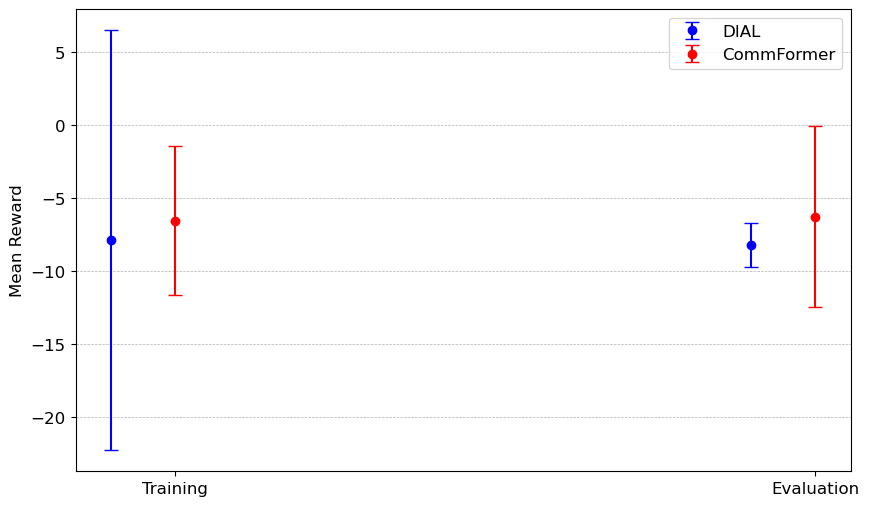

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, faizan_mean_reward, yerr=faizan_std_reward, fmt='o', capsize=5, label='DIAL', color='blue')

# Plotting the bars for CommFormer
plt.errorbar(x_pos, mean_reward, yerr=std_reward, fmt='o', capsize=5, label='CommFormer', color='red')


# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
#plt.title('Evaluation Scores with Standard Deviation for Phase 1')
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


# Heterogeneous agents results

Results found in the CyMARL-CommFormer/baseline_results/phase2_confidentiality_small_heterogeneous folder.

In [15]:
# Load the CSV file
csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\phase2_confidentiality_small_heterogeneous\heterogeneous_average_episode_rewards.csv"
df_heterogeneous_avg_rewards = pd.read_csv(csv_path)

df_heterogeneous_avg_rewards.drop(columns=['Wall time'], inplace=True)

# Display the last few rows to verify
print(df_heterogeneous_avg_rewards.tail())

        Step     Value
343  4940640 -6.793750
344  4955040 -5.791666
345  4969440 -7.320833
346  4983840 -5.843750
347  4998240 -5.843750


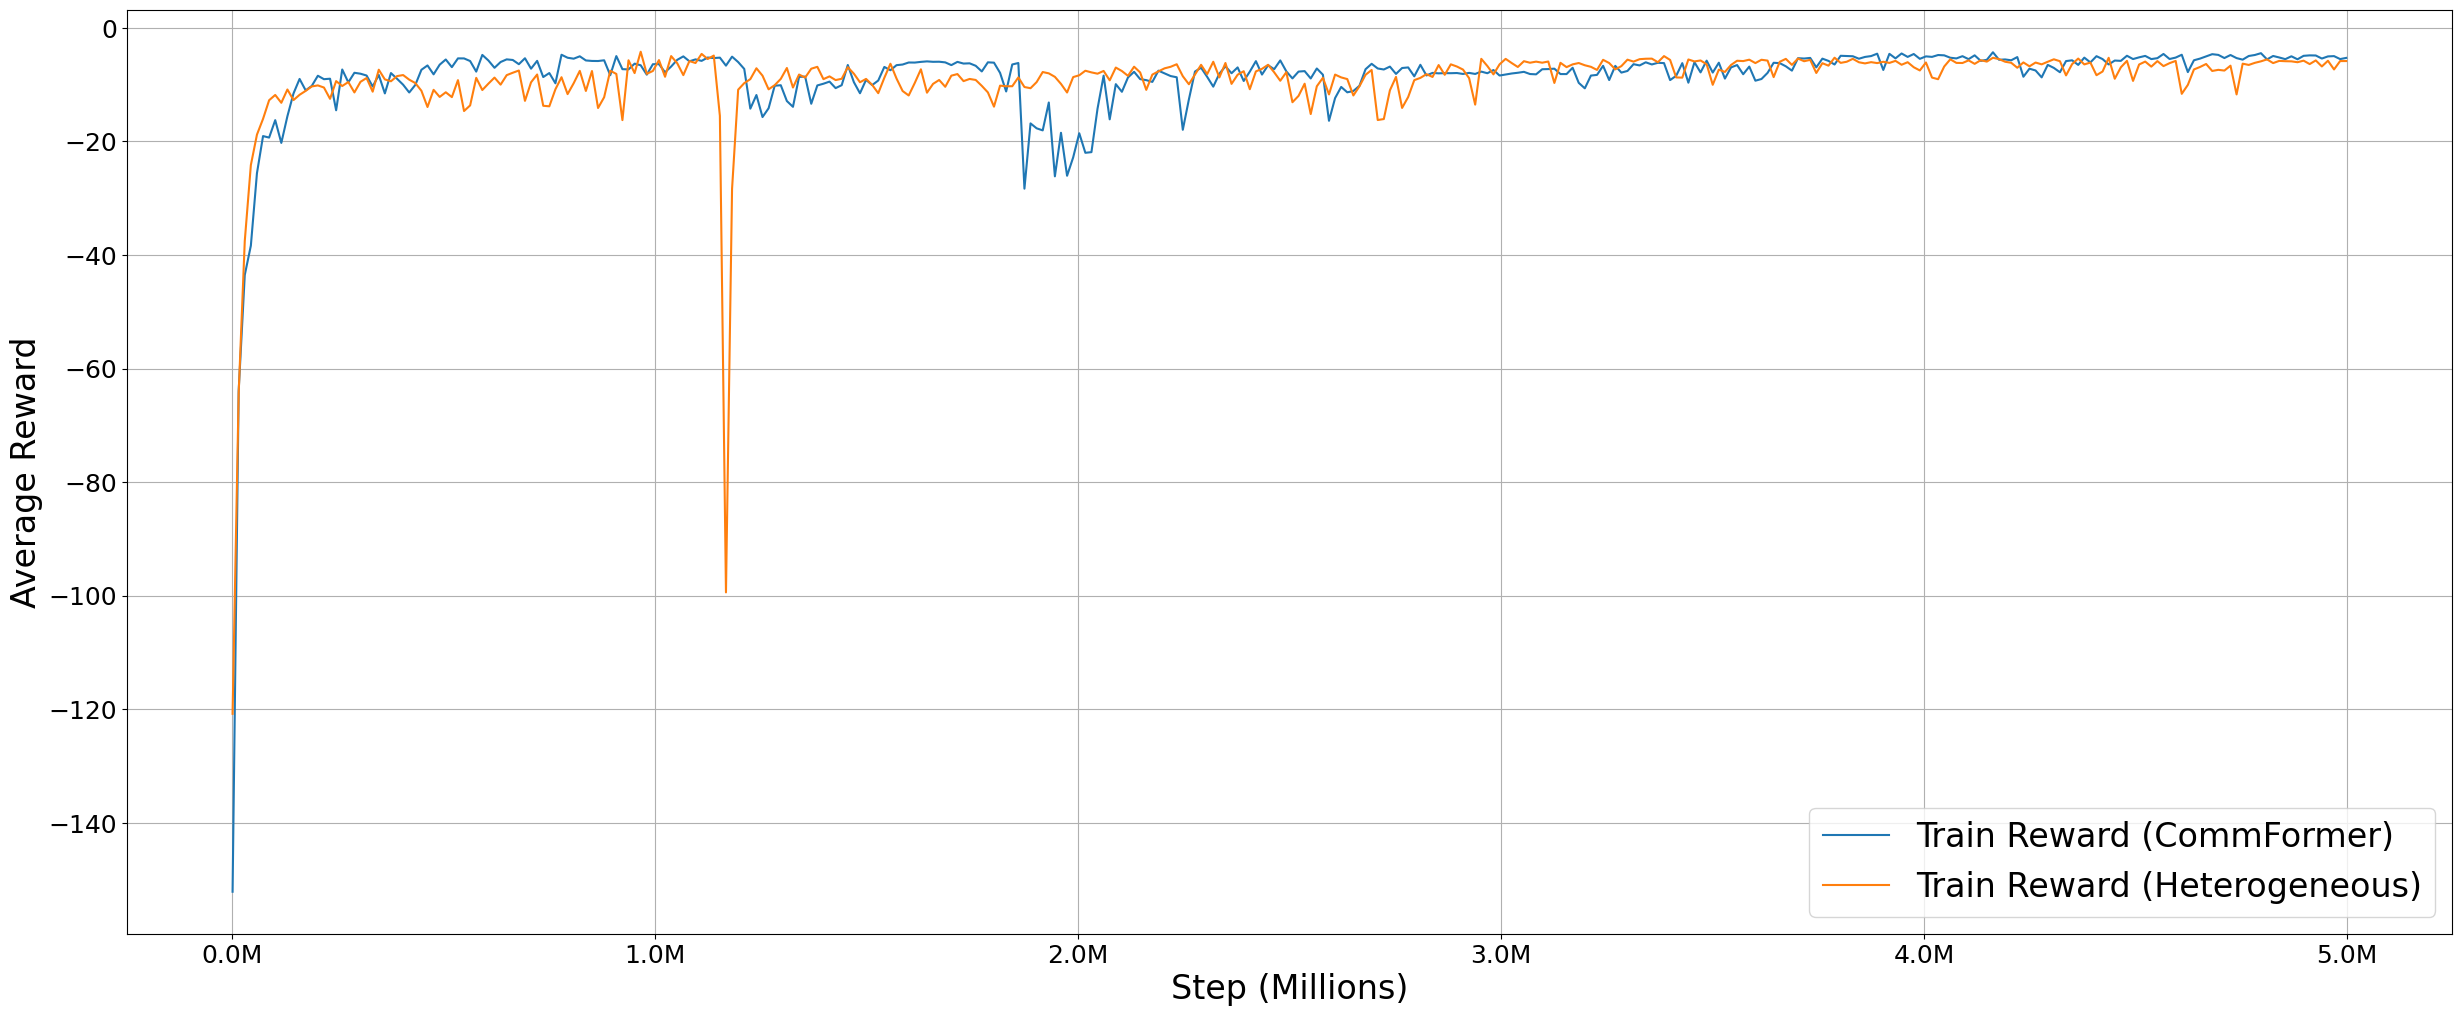

In [19]:
# Plot the average mean value per step from df_avg_rewards and df_faizan_confidentiality_small
plt.figure(figsize=(30, 12))
# Filter df_avg_rewards to only include steps up to 5M
df_avg_rewards_5M = df_avg_rewards[df_avg_rewards['Step'] <= 5e6]
plt.plot(df_avg_rewards_5M['Step'].to_numpy() / 1e6, df_avg_rewards_5M['Value'].to_numpy(), label='Train Reward (CommFormer)')
plt.plot(df_heterogeneous_avg_rewards['Step'].to_numpy() / 1e6, df_heterogeneous_avg_rewards['Value'].to_numpy(), label='Train Reward (Heterogeneous)')
plt.xlabel('Step (Millions)', fontsize=24)
plt.ylabel('Average Reward', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title('Average Reward per Step')
plt.grid(True)
plt.legend(fontsize=24)

# Format x-axis ticks to show 'M'
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [22]:
heterogeneous_std_reward = []
heterogeneous_mean_reward = []

heterogeneous_std_reward.append(df_heterogeneous_avg_rewards['Value'].std())
heterogeneous_mean_reward.append(df_heterogeneous_avg_rewards['Value'].mean())

print("Updated Mean Rewards:", mean_reward)
print("Updated Standard Deviation:", std_reward)

Updated Mean Rewards: [-6.542924826397494, -6.269438325428143]
Updated Standard Deviation: [5.116402734067942, 6.1698132885375365]


In [23]:
# Load the CSV file
csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\phase2_confidentiality_small_heterogeneous\heterogeneous_eval_average_episode_rewards.csv"
df_heterogeneous_eval_avg_rewards = pd.read_csv(csv_path)

df_heterogeneous_eval_avg_rewards.drop(columns=['Wall time'], inplace=True)

In [24]:
heterogeneous_std_reward.append(df_heterogeneous_eval_avg_rewards['Value'].std())
heterogeneous_mean_reward.append(df_heterogeneous_eval_avg_rewards['Value'].mean())

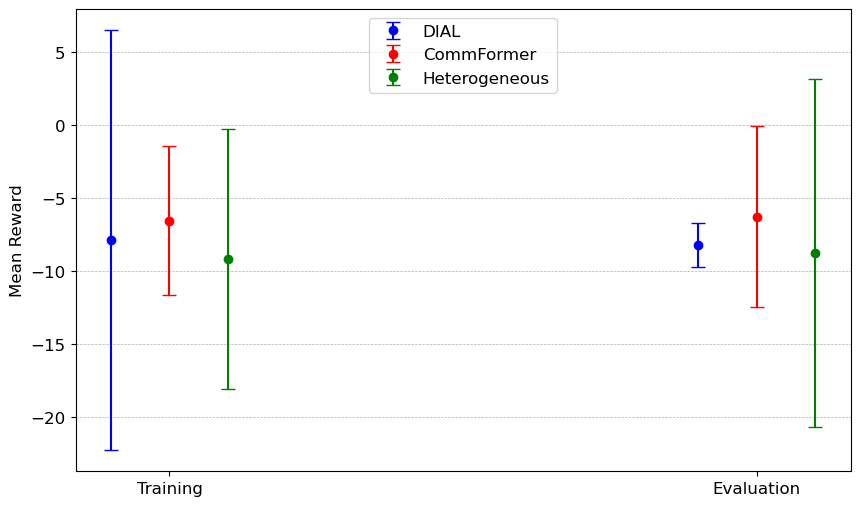

In [25]:
# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, faizan_mean_reward, yerr=faizan_std_reward, fmt='o', capsize=5, label='DIAL', color='blue')

# Plotting the bars for CommFormer
plt.errorbar(x_pos, mean_reward, yerr=std_reward, fmt='o', capsize=5, label='CommFormer', color='red')

# Plotting the bars for Heterogeneous
plt.errorbar(x_pos + 0.1, heterogeneous_mean_reward, yerr=heterogeneous_std_reward, fmt='o', capsize=5, label='Heterogeneous', color='green')

# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
#plt.title('Evaluation Scores with Standard Deviation for Phase 1')
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [26]:
print("heterogeneous_mean_reward:", heterogeneous_mean_reward)
print("heterogeneous_std_reward:", heterogeneous_std_reward)

heterogeneous_mean_reward: [-9.177466434993963, -8.742816126894677]
heterogeneous_std_reward: [8.89018131155835, 11.928250503635171]


# CommFormer Instability Exploration

In [2]:
# Load the best run CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250417-183826-small_run-use_linear_lr_decay-best-run\train_avg_ep_rew.csv"
df_best_run = pd.read_csv(csv_path)
df_best_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250417-183826-small_run-use_linear_lr_decay-best-run\eval_avg_ep_rew.csv"
df_eval_best_run = pd.read_csv(csv_path)
df_eval_best_run.drop(columns=['Wall time'], inplace=True)

# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250417-144623-small_run-use_linear_lr_decay\train_avg_ep_rew.csv"
df_lr_decay_seed_2_run = pd.read_csv(csv_path)
df_lr_decay_seed_2_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250417-144623-small_run-use_linear_lr_decay\eval_avg_ep_rew.csv"
df_eval_lr_decay_seed_2_run = pd.read_csv(csv_path)
df_eval_lr_decay_seed_2_run.drop(columns=['Wall time'], inplace=True)

# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250618-175433-small-run_use_linear_lr_decay-seed_4-poor_result\train_avg_ep_rew.csv"
df_lr_decay_seed_4_run = pd.read_csv(csv_path)
df_lr_decay_seed_4_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250618-175433-small-run_use_linear_lr_decay-seed_4-poor_result\eval_avg_ep_rew.csv"
df_eval_lr_decay_seed_4_run = pd.read_csv(csv_path)
df_eval_lr_decay_seed_4_run.drop(columns=['Wall time'], inplace=True)

# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250618-213314-small-run_use_linear_lr_decay-seed_4-poor_result-older_version_code\run-average_episode_rewards_average_episode_rewards-tag-average_episode_rewards(1).csv"
df_lr_decay_seed_4_rollback_run = pd.read_csv(csv_path)
df_lr_decay_seed_4_rollback_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250618-213314-small-run_use_linear_lr_decay-seed_4-poor_result-older_version_code\run-eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards(1).csv"
df_eval_lr_decay_seed_4_rollback_run = pd.read_csv(csv_path)
df_eval_lr_decay_seed_4_rollback_run.drop(columns=['Wall time'], inplace=True)

# load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250619-003331-small-run_no_linear_lr_decay-seed_1-poor_result-older_version_code\run-average_episode_rewards_average_episode_rewards-tag-average_episode_rewards(1).csv"
df_no_lr_decay_seed_1_rollback_run = pd.read_csv(csv_path)
df_no_lr_decay_seed_1_rollback_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250619-003331-small-run_no_linear_lr_decay-seed_1-poor_result-older_version_code\run-eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards(1).csv"
df_eval_no_lr_decay_seed_1_rollback_run = pd.read_csv(csv_path)
df_eval_no_lr_decay_seed_1_rollback_run.drop(columns=['Wall time'], inplace=True)

# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250619-031211-small-run_no_linear_lr_decay-seed_2-ok_result-older_version_code\run-average_episode_rewards_average_episode_rewards-tag-average_episode_rewards(1).csv"
df_no_lr_decay_seed_2_rollback_run = pd.read_csv(csv_path)
df_no_lr_decay_seed_2_rollback_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250619-031211-small-run_no_linear_lr_decay-seed_2-ok_result-older_version_code\run-eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards(1).csv"
df_eval_no_lr_decay_seed_2_rollback_run = pd.read_csv(csv_path)
df_eval_no_lr_decay_seed_2_rollback_run.drop(columns=['Wall time'], inplace=True)

# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250619-055106-small-run_no_linear_lr_decay-seed_3-ok_result-older_version_code\run-average_episode_rewards_average_episode_rewards-tag-average_episode_rewards(1).csv"
df_no_lr_decay_seed_3_rollback_run = pd.read_csv(csv_path)
df_no_lr_decay_seed_3_rollback_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_mismatch\commformer_dec\check\mgdt-250619-055106-small-run_no_linear_lr_decay-seed_3-ok_result-older_version_code\run-eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards(1).csv"
df_eval_no_lr_decay_seed_3_rollback_run = pd.read_csv(csv_path)
df_eval_no_lr_decay_seed_3_rollback_run.drop(columns=['Wall time'], inplace=True)

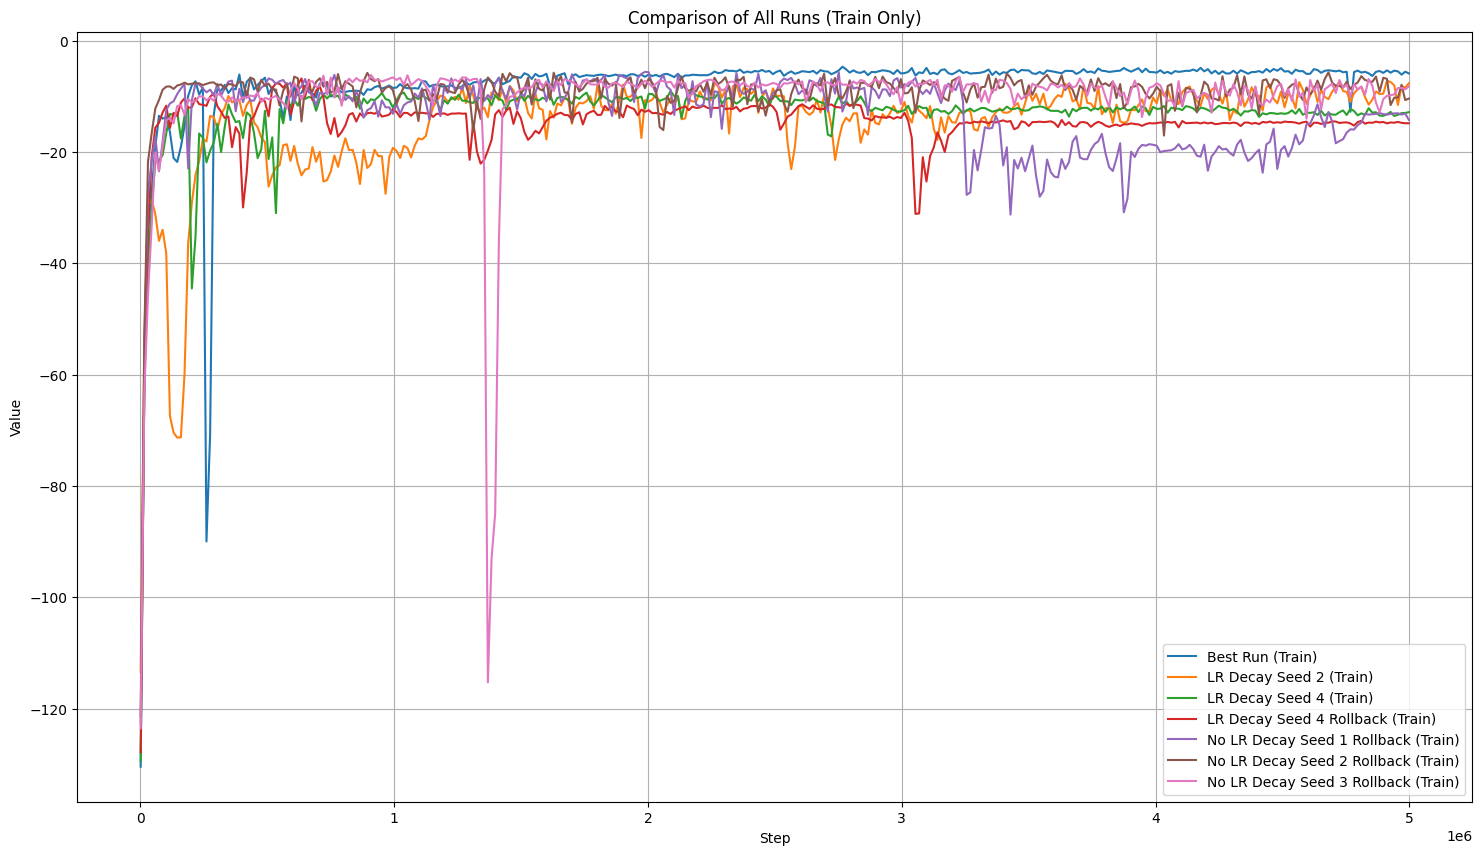

In [10]:
plt.figure(figsize=(18, 10))

plt.plot(df_best_run['Step'].to_numpy(), df_best_run['Value'].to_numpy(), label='Best Run (Train)')
plt.plot(df_lr_decay_seed_2_run['Step'].to_numpy(), df_lr_decay_seed_2_run['Value'].to_numpy(), label='LR Decay Seed 2 (Train)')
plt.plot(df_lr_decay_seed_4_run['Step'].to_numpy(), df_lr_decay_seed_4_run['Value'].to_numpy(), label='LR Decay Seed 4 (Train)')
plt.plot(df_lr_decay_seed_4_rollback_run['Step'].to_numpy(), df_lr_decay_seed_4_rollback_run['Value'].to_numpy(), label='LR Decay Seed 4 Rollback (Train)')
plt.plot(df_no_lr_decay_seed_1_rollback_run['Step'].to_numpy(), df_no_lr_decay_seed_1_rollback_run['Value'].to_numpy(), label='No LR Decay Seed 1 Rollback (Train)')
plt.plot(df_no_lr_decay_seed_2_rollback_run['Step'].to_numpy(), df_no_lr_decay_seed_2_rollback_run['Value'].to_numpy(), label='No LR Decay Seed 2 Rollback (Train)')
plt.plot(df_no_lr_decay_seed_3_rollback_run['Step'].to_numpy(), df_no_lr_decay_seed_3_rollback_run['Value'].to_numpy(), label='No LR Decay Seed 3 Rollback (Train)')

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Comparison of All Runs (Train Only)')
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


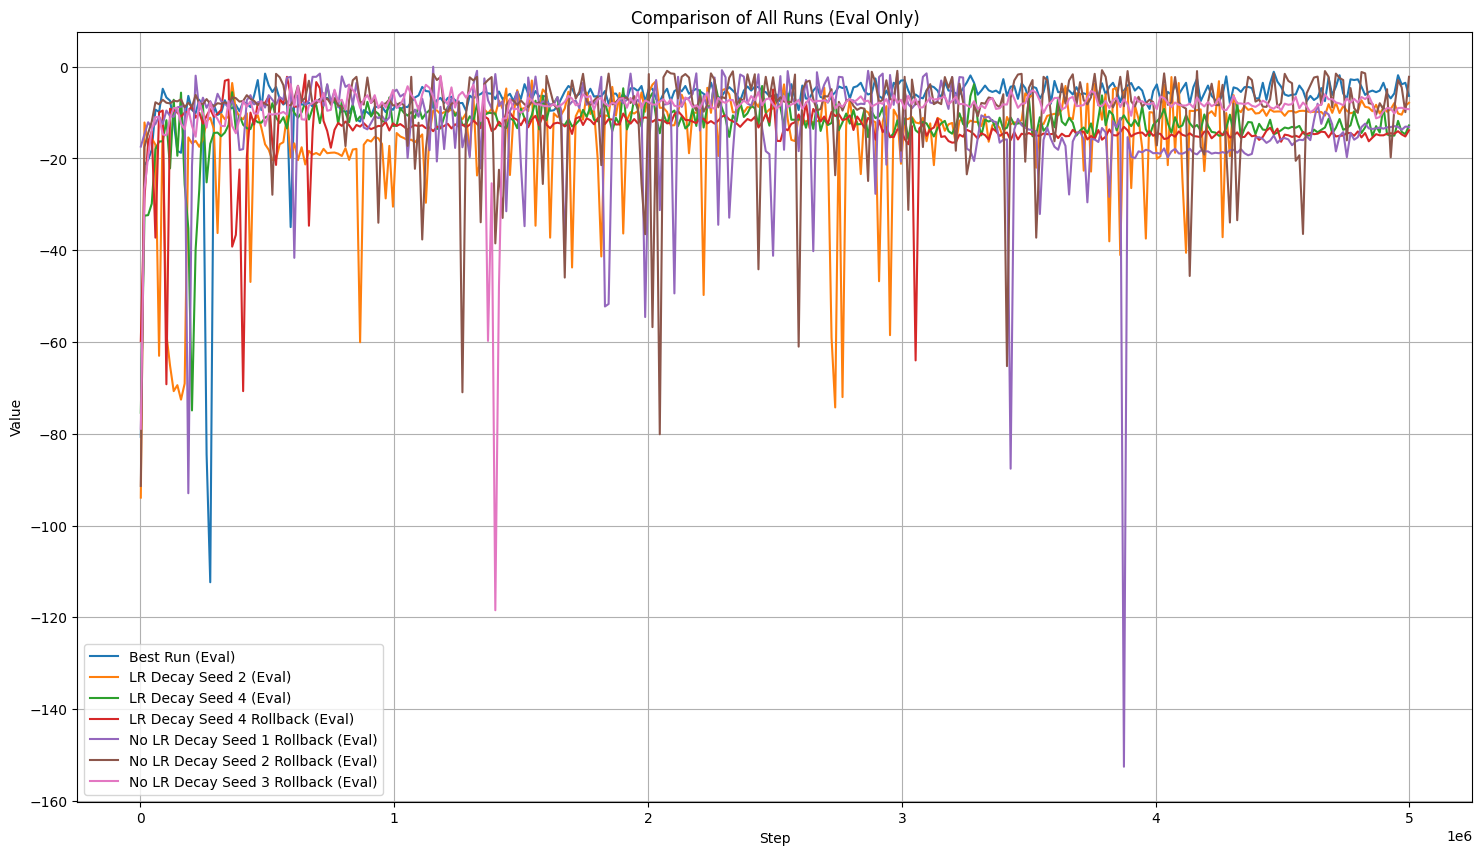

In [11]:
plt.figure(figsize=(18, 10))

plt.plot(df_eval_best_run['Step'].to_numpy(), df_eval_best_run['Value'].to_numpy(), label='Best Run (Eval)')
plt.plot(df_eval_lr_decay_seed_2_run['Step'].to_numpy(), df_eval_lr_decay_seed_2_run['Value'].to_numpy(), label='LR Decay Seed 2 (Eval)')
plt.plot(df_eval_lr_decay_seed_4_run['Step'].to_numpy(), df_eval_lr_decay_seed_4_run['Value'].to_numpy(), label='LR Decay Seed 4 (Eval)')
plt.plot(df_eval_lr_decay_seed_4_rollback_run['Step'].to_numpy(), df_eval_lr_decay_seed_4_rollback_run['Value'].to_numpy(), label='LR Decay Seed 4 Rollback (Eval)')
plt.plot(df_eval_no_lr_decay_seed_1_rollback_run['Step'].to_numpy(), df_eval_no_lr_decay_seed_1_rollback_run['Value'].to_numpy(), label='No LR Decay Seed 1 Rollback (Eval)')
plt.plot(df_eval_no_lr_decay_seed_2_rollback_run['Step'].to_numpy(), df_eval_no_lr_decay_seed_2_rollback_run['Value'].to_numpy(), label='No LR Decay Seed 2 Rollback (Eval)')
plt.plot(df_eval_no_lr_decay_seed_3_rollback_run['Step'].to_numpy(), df_eval_no_lr_decay_seed_3_rollback_run['Value'].to_numpy(), label='No LR Decay Seed 3 Rollback (Eval)')

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Comparison of All Runs (Eval Only)')
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()

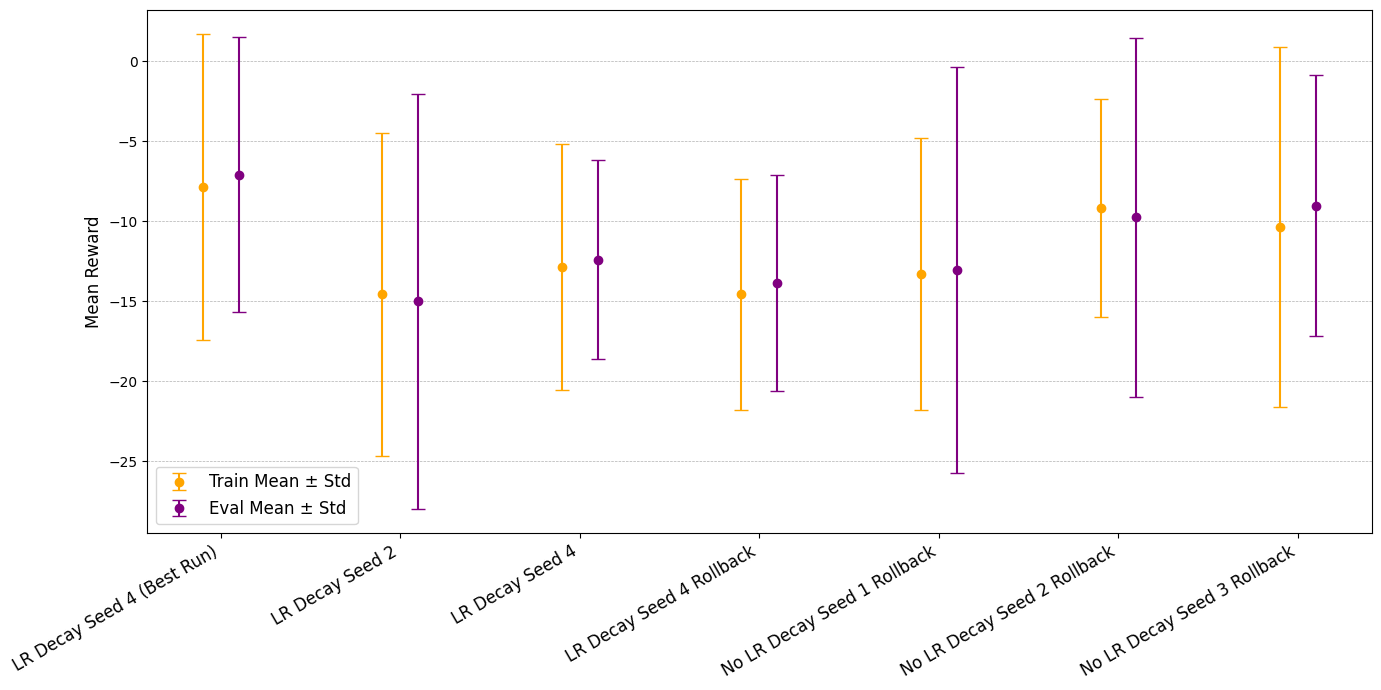

In [4]:
# Define the data
scenarios = ['LR Decay Seed 4 (Best Run)', 'LR Decay Seed 2', 'LR Decay Seed 4', 'LR Decay Seed 4 Rollback',
             'No LR Decay Seed 1 Rollback', 'No LR Decay Seed 2 Rollback', 'No LR Decay Seed 3 Rollback']

# Compute mean and std for each run (Train and Eval)
mean_rewards_eval = [
    df_eval_best_run['Value'].mean(),
    df_eval_lr_decay_seed_2_run['Value'].mean(),
    df_eval_lr_decay_seed_4_run['Value'].mean(),
    df_eval_lr_decay_seed_4_rollback_run['Value'].mean(),
    df_eval_no_lr_decay_seed_1_rollback_run['Value'].mean(),
    df_eval_no_lr_decay_seed_2_rollback_run['Value'].mean(),
    df_eval_no_lr_decay_seed_3_rollback_run['Value'].mean()
]
std_rewards_eval = [
    df_eval_best_run['Value'].std(),
    df_eval_lr_decay_seed_2_run['Value'].std(),
    df_eval_lr_decay_seed_4_run['Value'].std(),
    df_eval_lr_decay_seed_4_rollback_run['Value'].std(),
    df_eval_no_lr_decay_seed_1_rollback_run['Value'].std(),
    df_eval_no_lr_decay_seed_2_rollback_run['Value'].std(),
    df_eval_no_lr_decay_seed_3_rollback_run['Value'].std()
]

mean_rewards_train = [
    df_best_run['Value'].mean(),
    df_lr_decay_seed_2_run['Value'].mean(),
    df_lr_decay_seed_4_run['Value'].mean(),
    df_lr_decay_seed_4_rollback_run['Value'].mean(),
    df_no_lr_decay_seed_1_rollback_run['Value'].mean(),
    df_no_lr_decay_seed_2_rollback_run['Value'].mean(),
    df_no_lr_decay_seed_3_rollback_run['Value'].mean()
]
std_rewards_train = [
    df_best_run['Value'].std(),
    df_lr_decay_seed_2_run['Value'].std(),
    df_lr_decay_seed_4_run['Value'].std(),
    df_lr_decay_seed_4_rollback_run['Value'].std(),
    df_no_lr_decay_seed_1_rollback_run['Value'].std(),
    df_no_lr_decay_seed_2_rollback_run['Value'].std(),
    df_no_lr_decay_seed_3_rollback_run['Value'].std()
]

x_pos = np.arange(len(scenarios))

plt.figure(figsize=(14, 7))
plt.errorbar(x_pos - 0.1, mean_rewards_train, yerr=std_rewards_train, fmt='o', capsize=5, color='orange', label='Train Mean ± Std')
plt.errorbar(x_pos + 0.1, mean_rewards_eval, yerr=std_rewards_eval, fmt='o', capsize=5, color='purple', label='Eval Mean ± Std')
plt.xticks(x_pos, scenarios, rotation=30, ha='right', fontsize=12)
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Host Agent Scenario - Proof of Concept

No hyper-parameter tuning done yet.

In [ ]:
# Load the CSV file
csv_path = r"C:\Users\Alex\Downloads\host_agents_train_avg_ep_rew.csv"
df_host_agents_run = pd.read_csv(csv_path)
df_host_agents_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"C:\Users\Alex\Downloads\host_agents_eval_avg_ep_rew.csv"
df_host_agents_eval_run = pd.read_csv(csv_path)
df_host_agents_eval_run.drop(columns=['Wall time'], inplace=True)

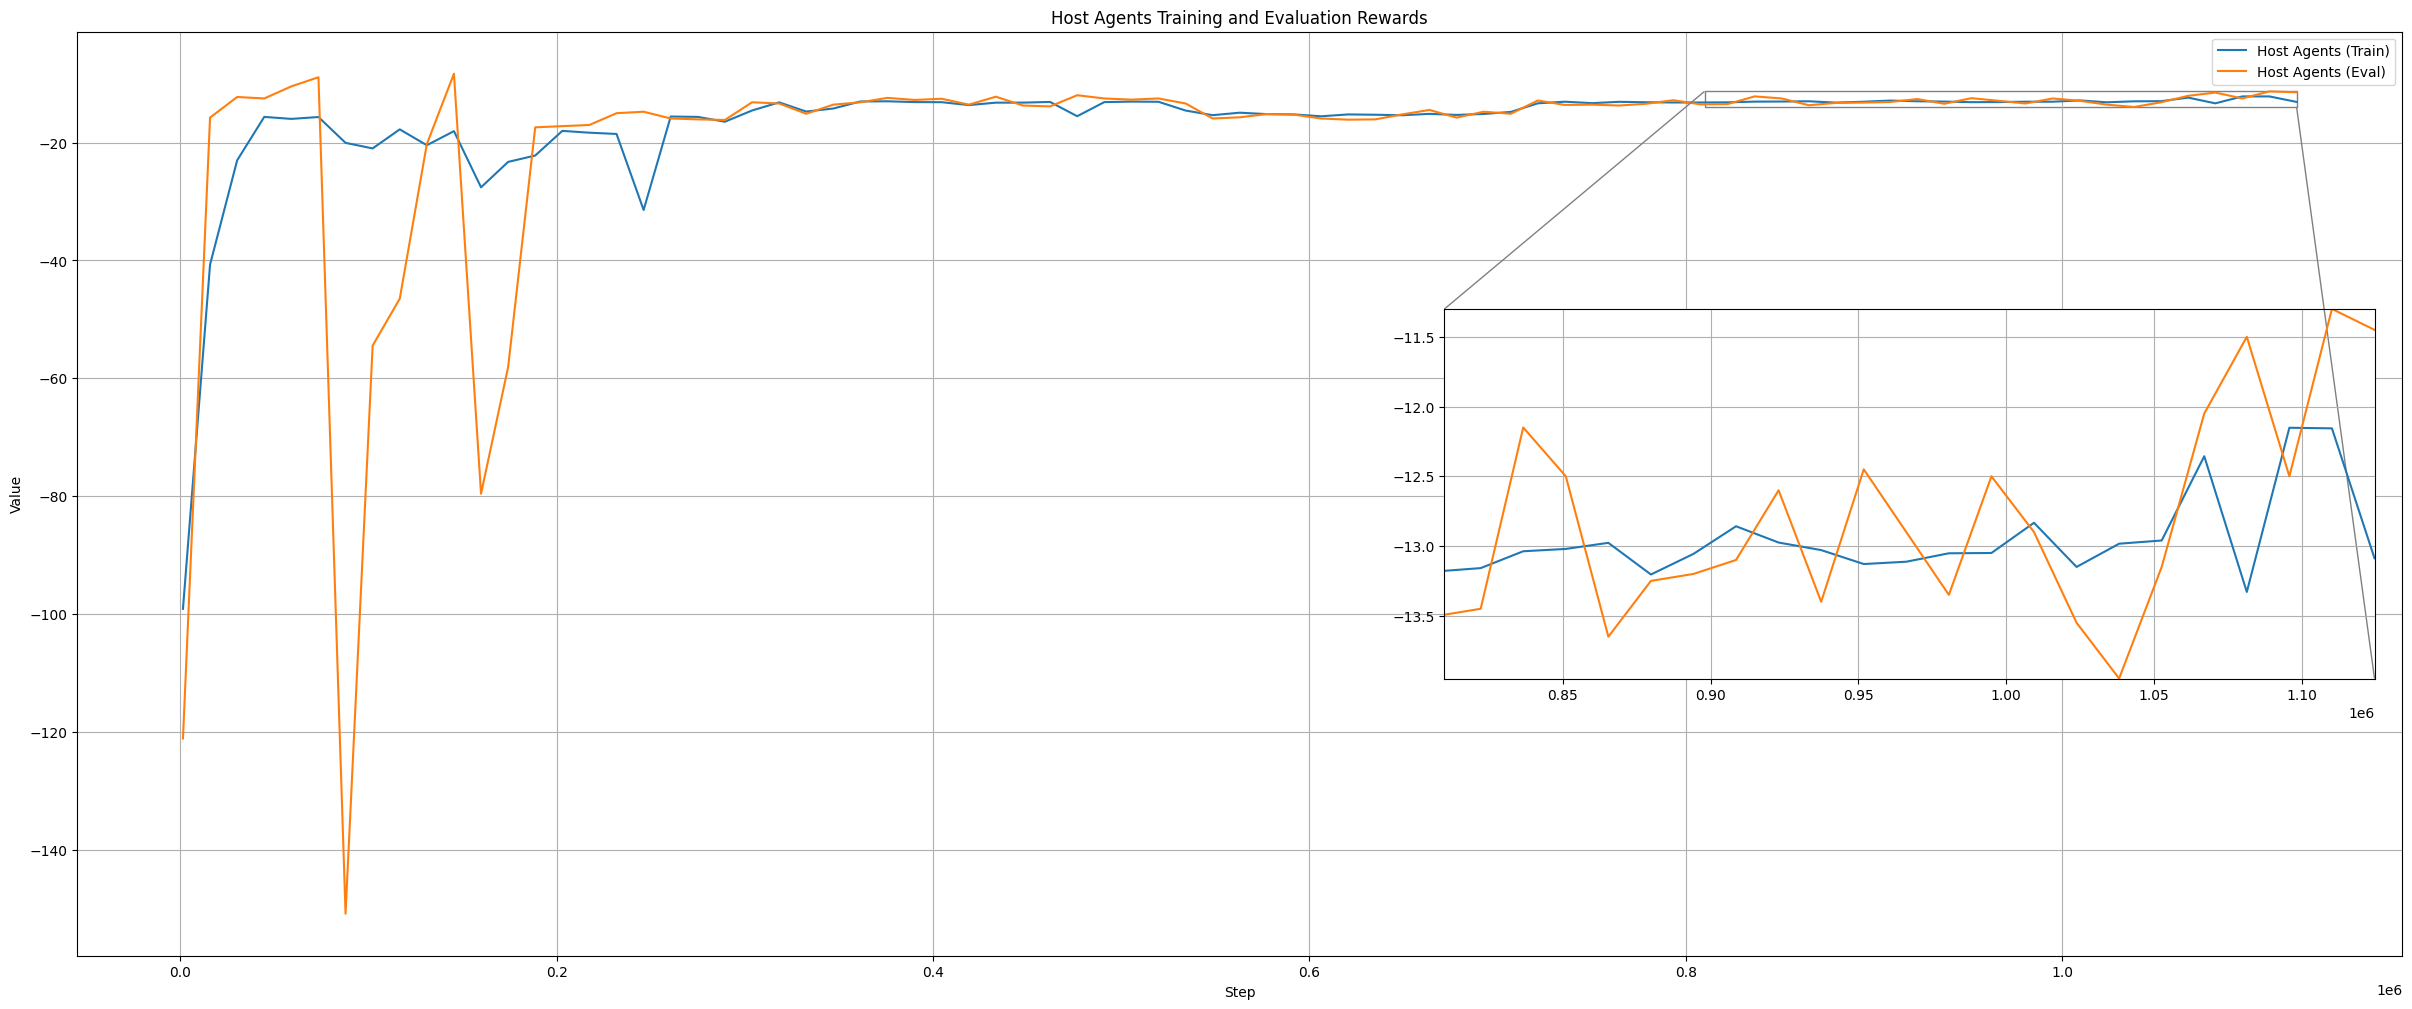

In [ ]:
plt.figure(figsize=(30, 12))
ax = plt.gca()
ax.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Host Agents (Train)')
ax.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Host Agents (Eval)')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Host Agents Training and Evaluation Rewards')
plt.legend()
plt.grid(True)

# Inset axes for zoomed region from 0.81e6 steps onward
axins = inset_axes(ax, width="40%", height="40%", loc='center right', borderpad=2)
axins.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Train')
axins.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Eval')
x1 = 0.81e6
x2 = df_host_agents_run['Step'].max()
axins.set_xlim(x1, x2)
# Set y-limits based on the zoomed data
ymin = min(
    df_host_agents_run[df_host_agents_run['Step'] >= x1]['Value'].min(),
    df_host_agents_eval_run[df_host_agents_eval_run['Step'] >= x1]['Value'].min()
)
ymax = max(
    df_host_agents_run[df_host_agents_run['Step'] >= x1]['Value'].max(),
    df_host_agents_eval_run[df_host_agents_eval_run['Step'] >= x1]['Value'].max()
)
axins.set_ylim(ymin, ymax)
axins.grid(True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [9]:
# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_host_agents\commformer_dec\check\mgdt-250619-215627\host_agents_train_avg_ep_rew.csv"
df_host_agents_run = pd.read_csv(csv_path)
df_host_agents_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_host_agents\commformer_dec\check\mgdt-250619-215627\host_agents_eval_avg_ep_rew.csv"
df_host_agents_eval_run = pd.read_csv(csv_path)
df_host_agents_eval_run.drop(columns=['Wall time'], inplace=True)

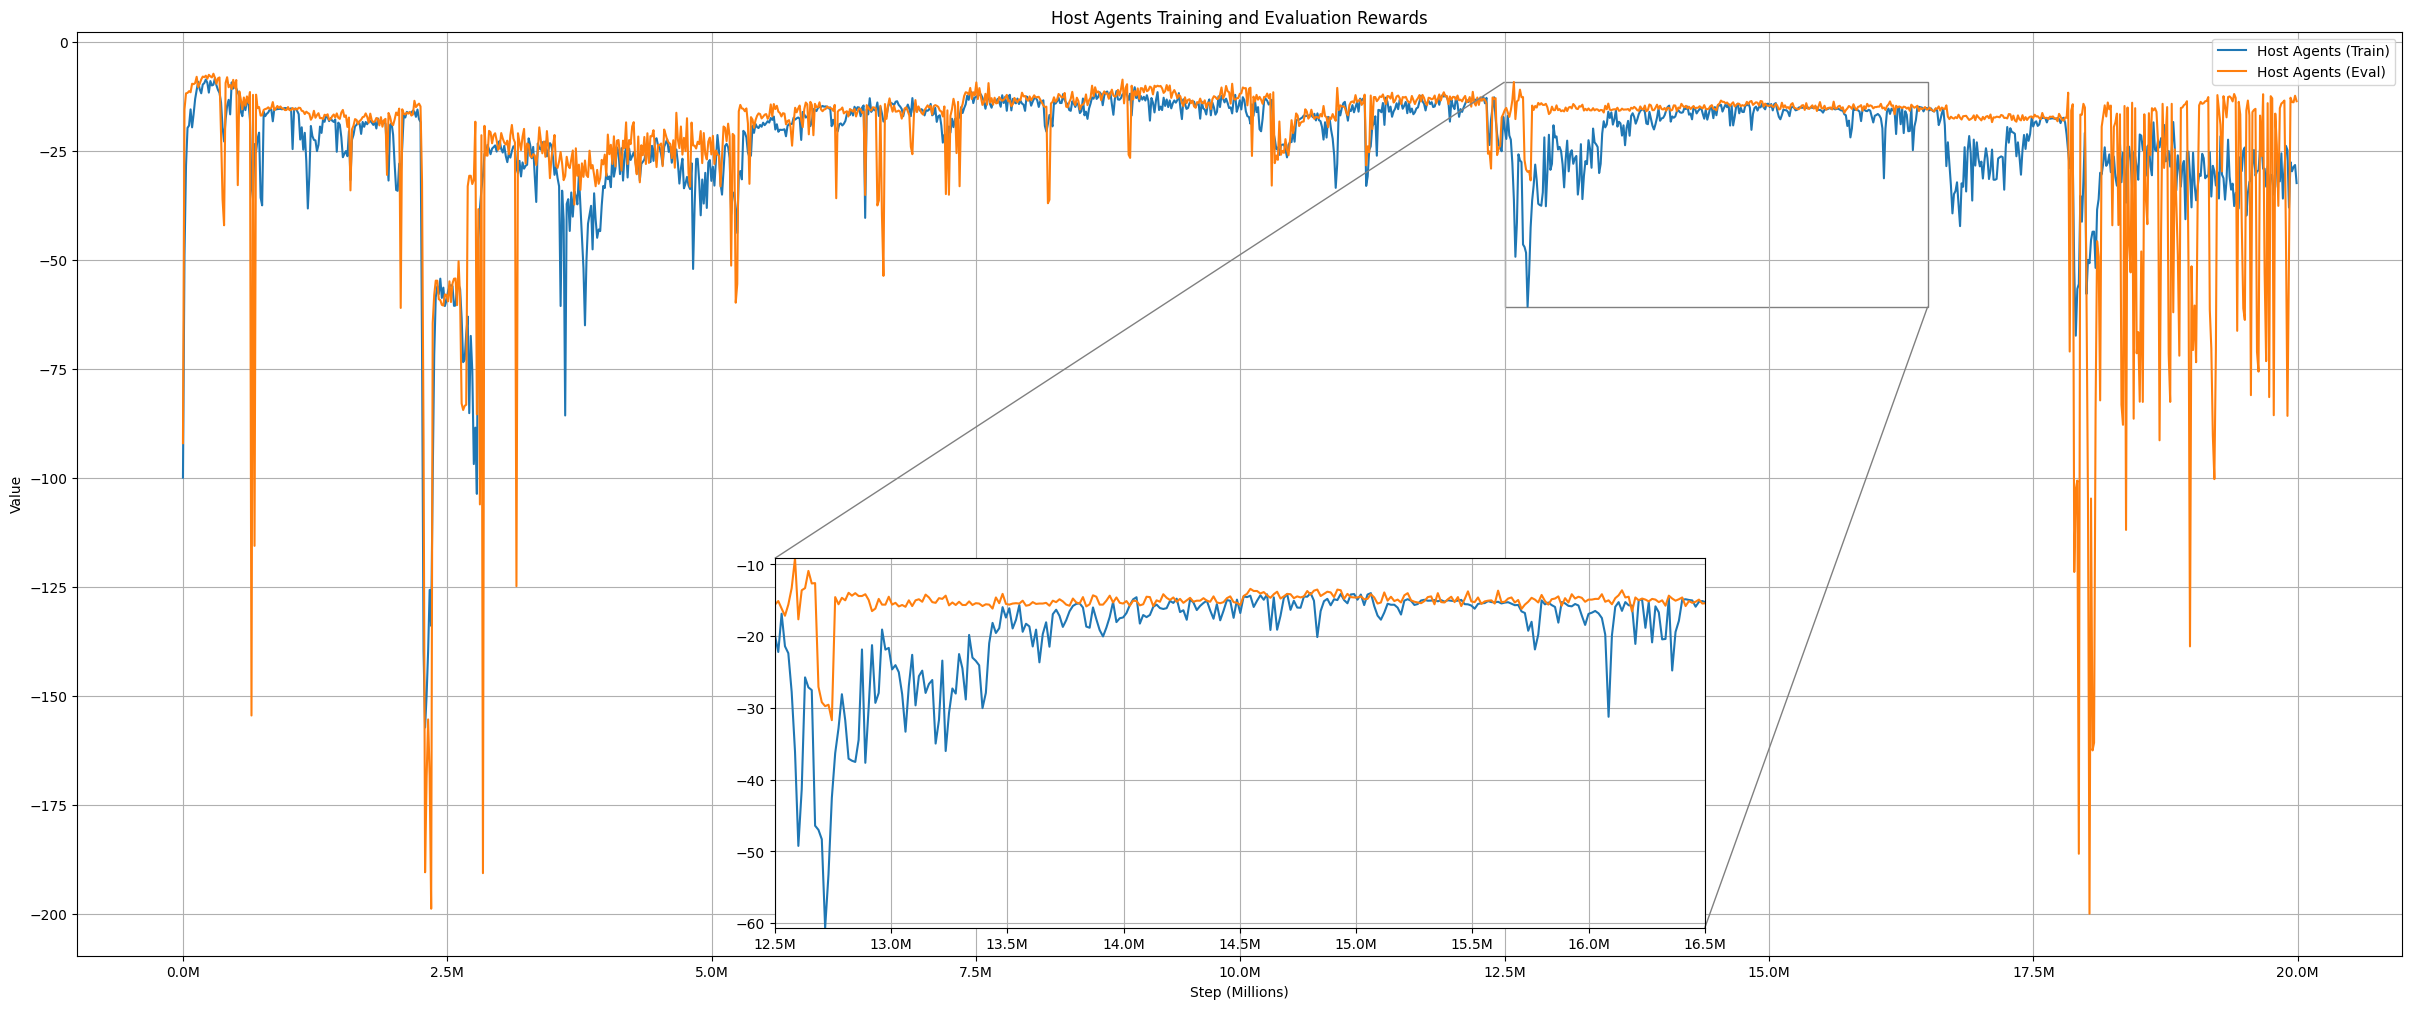

In [ ]:
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')

plt.figure(figsize=(30, 12))
ax = plt.gca()
ax.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Host Agents (Train)')
ax.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Host Agents (Eval)')
plt.xlabel('Step (Millions)')
plt.ylabel('Value')
plt.title('Host Agents Training and Evaluation Rewards')
plt.legend()
plt.grid(True)

# Format x-axis in millions
ax.xaxis.set_major_formatter(formatter)

# Inset axes for zoomed region from 1.25e7 to 1.65e7 steps
axins = inset_axes(ax, width="40%", height="40%", loc='lower center', borderpad=2)
axins.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Train')
axins.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Eval')
axins.set_xlim(x1, x2)
axins.set_ylim(ymin, ymax)
axins.xaxis.set_major_formatter(formatter)
axins.grid(True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()


In [35]:
# Load the CSV file
csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_host_agents\commformer_dec\check\mgdt-250704-011914-full_run-block_discount-costly_analysis-005_entropy_coeff\host_agents_train_avg_ep_rew.csv"
df_host_agents_run = pd.read_csv(csv_path)
df_host_agents_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"E:\results\CybORG\phase2_confidentiality_small_heterogeneous_host_agents\commformer_dec\check\mgdt-250704-011914-full_run-block_discount-costly_analysis-005_entropy_coeff\host_agents_eval_avg_ep_rew.csv"
df_host_agents_eval_run = pd.read_csv(csv_path)
df_host_agents_eval_run.drop(columns=['Wall time'], inplace=True)

In [36]:
df_host_agents_run.tail()

,Step,Value
1384,19931040,-52.491669
1385,19945440,-52.762497
1386,19959840,-53.043751
1387,19974240,-58.645836
1388,19988640,-57.047916


In [37]:
# Clip the dataframes to only hold data up to step 1.2 million
df_host_agents_run = df_host_agents_run[df_host_agents_run['Step'] <= 12000000].reset_index(drop=True)
df_host_agents_eval_run = df_host_agents_eval_run[df_host_agents_eval_run['Step'] <= 12000000].reset_index(drop=True)

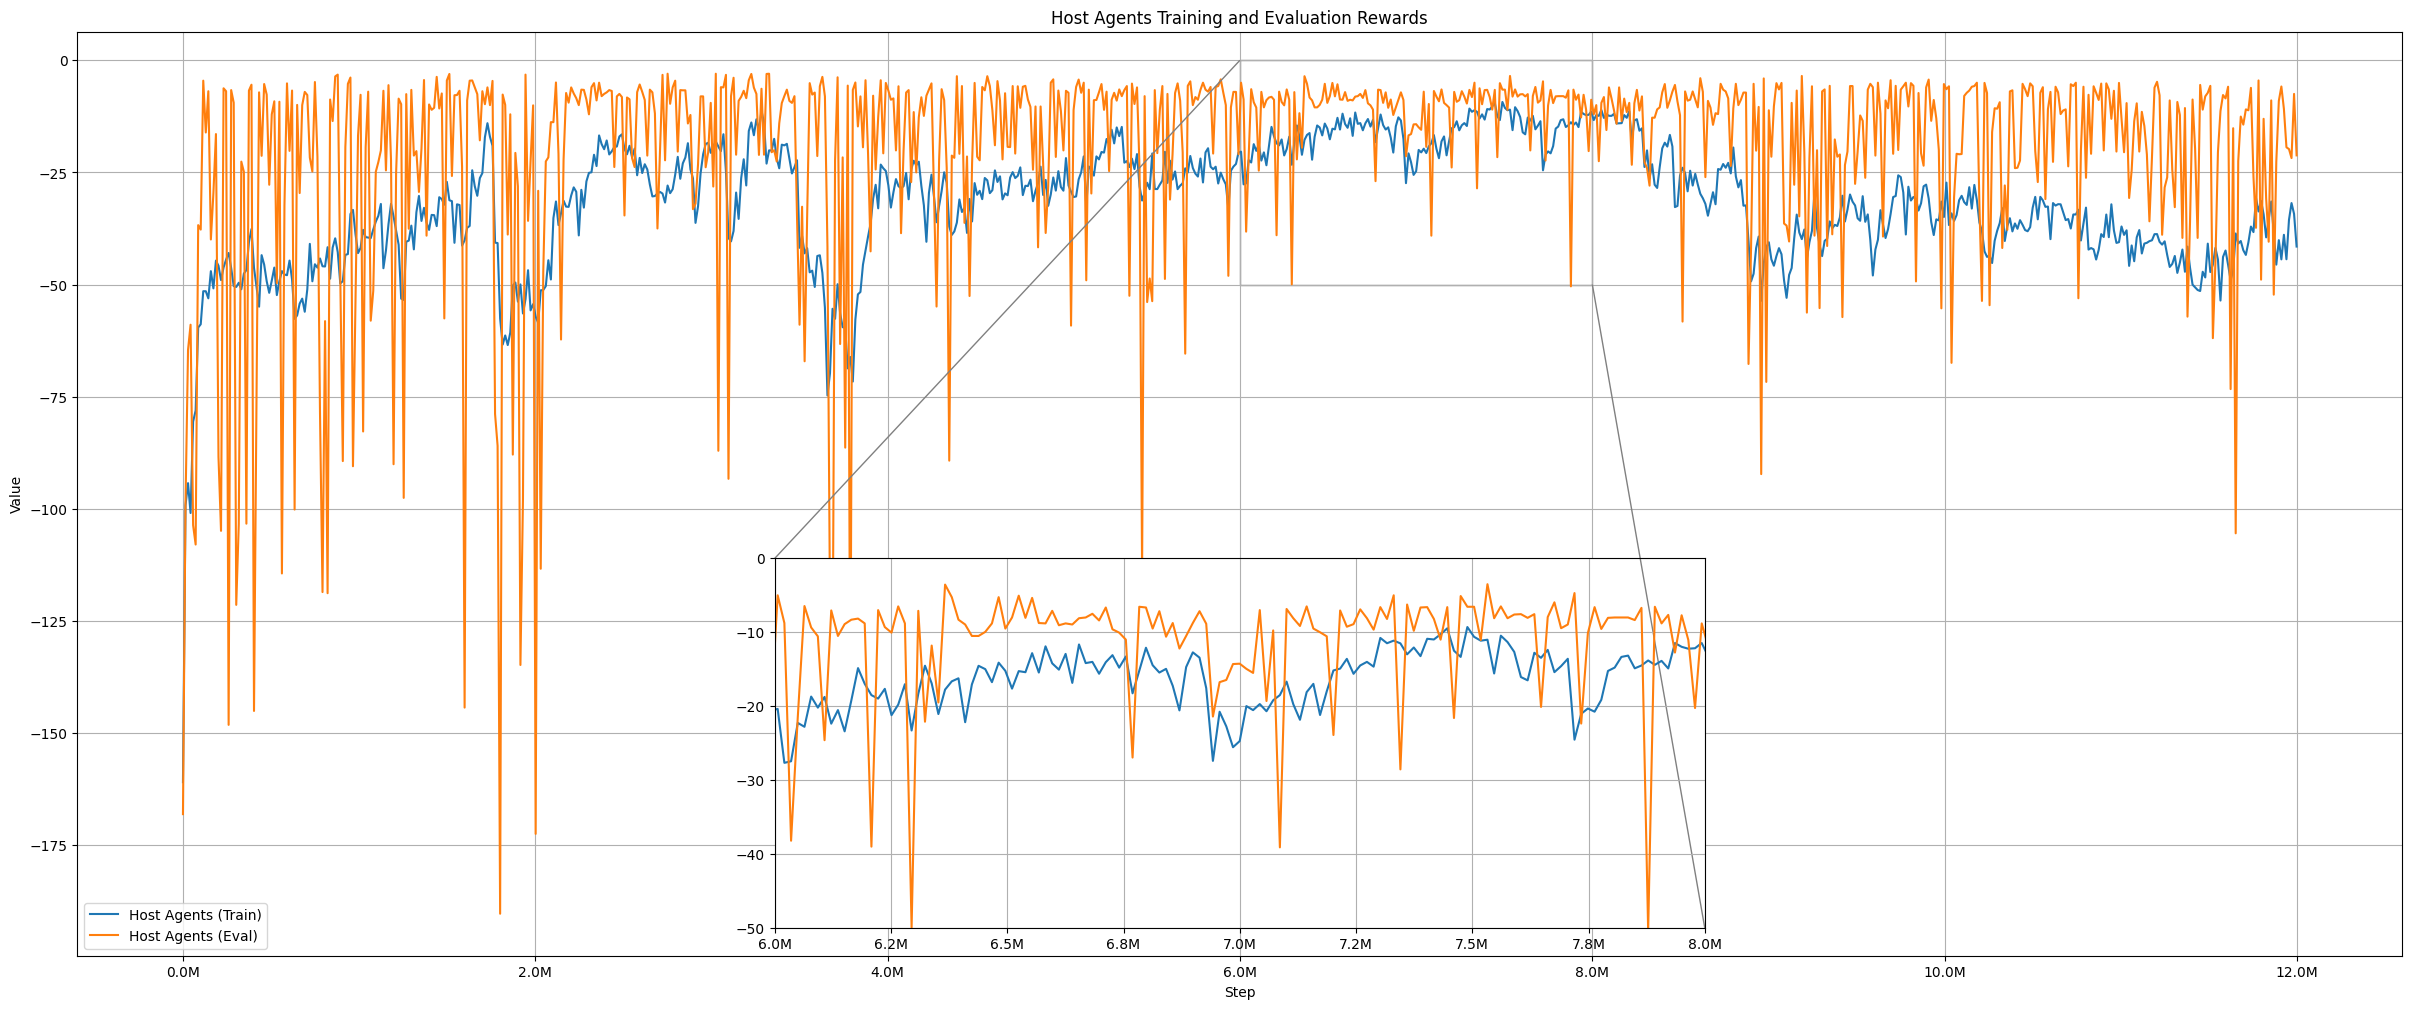

In [42]:
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')

plt.figure(figsize=(30, 12))
ax = plt.gca()
ax.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Host Agents (Train)')
ax.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Host Agents (Eval)')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Host Agents Training and Evaluation Rewards')
plt.legend()
plt.grid(True)

# Format x-axis in millions
ax.xaxis.set_major_formatter(formatter)

x1 = 6e6
x2 = 8e6
ymin = -50
ymax = 0

# Inset axes for zoomed region
axins = inset_axes(ax, width="40%", height="40%", loc='lower center', borderpad=2)
axins.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Train')
axins.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Eval')
axins.set_xlim(x1, x2)
axins.set_ylim(ymin, ymax)
axins.xaxis.set_major_formatter(formatter)
axins.grid(True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [44]:
host_agents_std_reward = []
host_agents_mean_reward = []

host_agents_std_reward.append(df_host_agents_run['Value'].std())
host_agents_mean_reward.append(df_host_agents_run['Value'].mean())

host_agents_std_reward.append(df_host_agents_eval_run['Value'].std())
host_agents_mean_reward.append(df_host_agents_eval_run['Value'].mean())

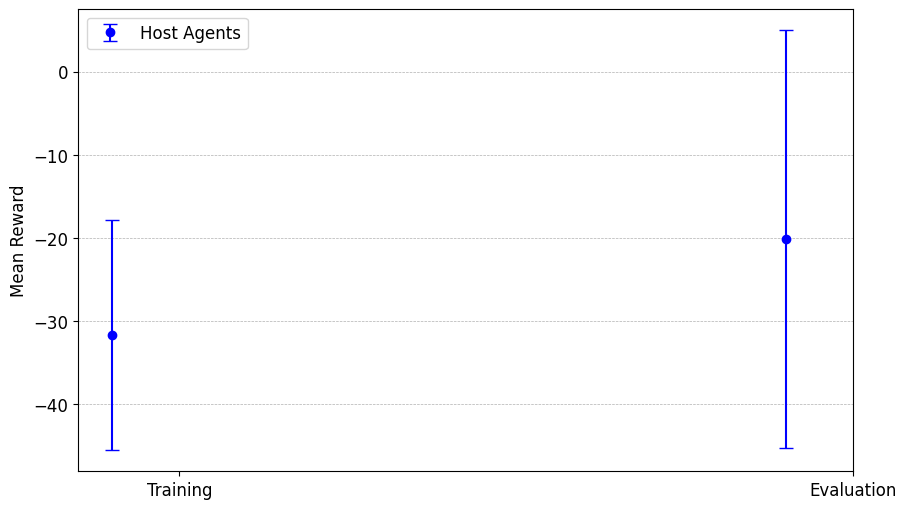

In [46]:
# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, host_agents_mean_reward, yerr=host_agents_std_reward, fmt='o', capsize=5, label='Host Agents', color='blue')

# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


# Host Agents - Best Run

Uses data from no_lr_decay, ppo_clip 0.5, ppo_epoch 10, entropy coef 0.3 run

In [32]:
# Load the CSV file
csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\phase2_confidentiality_small_host_agents\commformer_dec\no_lr_decay-ppo_clip_05-ppo_epoch_10-entropy_coef_03\mgdt-250708-003250\run-mgdt-250708-003250_logs_average_episode_rewards_average_episode_rewards-tag-average_episode_rewards.csv"
df_host_agents_run = pd.read_csv(csv_path)
df_host_agents_run.drop(columns=['Wall time'], inplace=True)

csv_path = r"C:\Users\Alex\anaconda3\envs\CyMARL-CommFormer\CyMARL-CommFormer\commformer\baseline_results\phase2_confidentiality_small_host_agents\commformer_dec\no_lr_decay-ppo_clip_05-ppo_epoch_10-entropy_coef_03\mgdt-250708-003250\run-mgdt-250708-003250_logs_eval_average_episode_rewards_eval_average_episode_rewards-tag-eval_average_episode_rewards.csv"
df_host_agents_eval_run = pd.read_csv(csv_path)
df_host_agents_eval_run.drop(columns=['Wall time'], inplace=True)

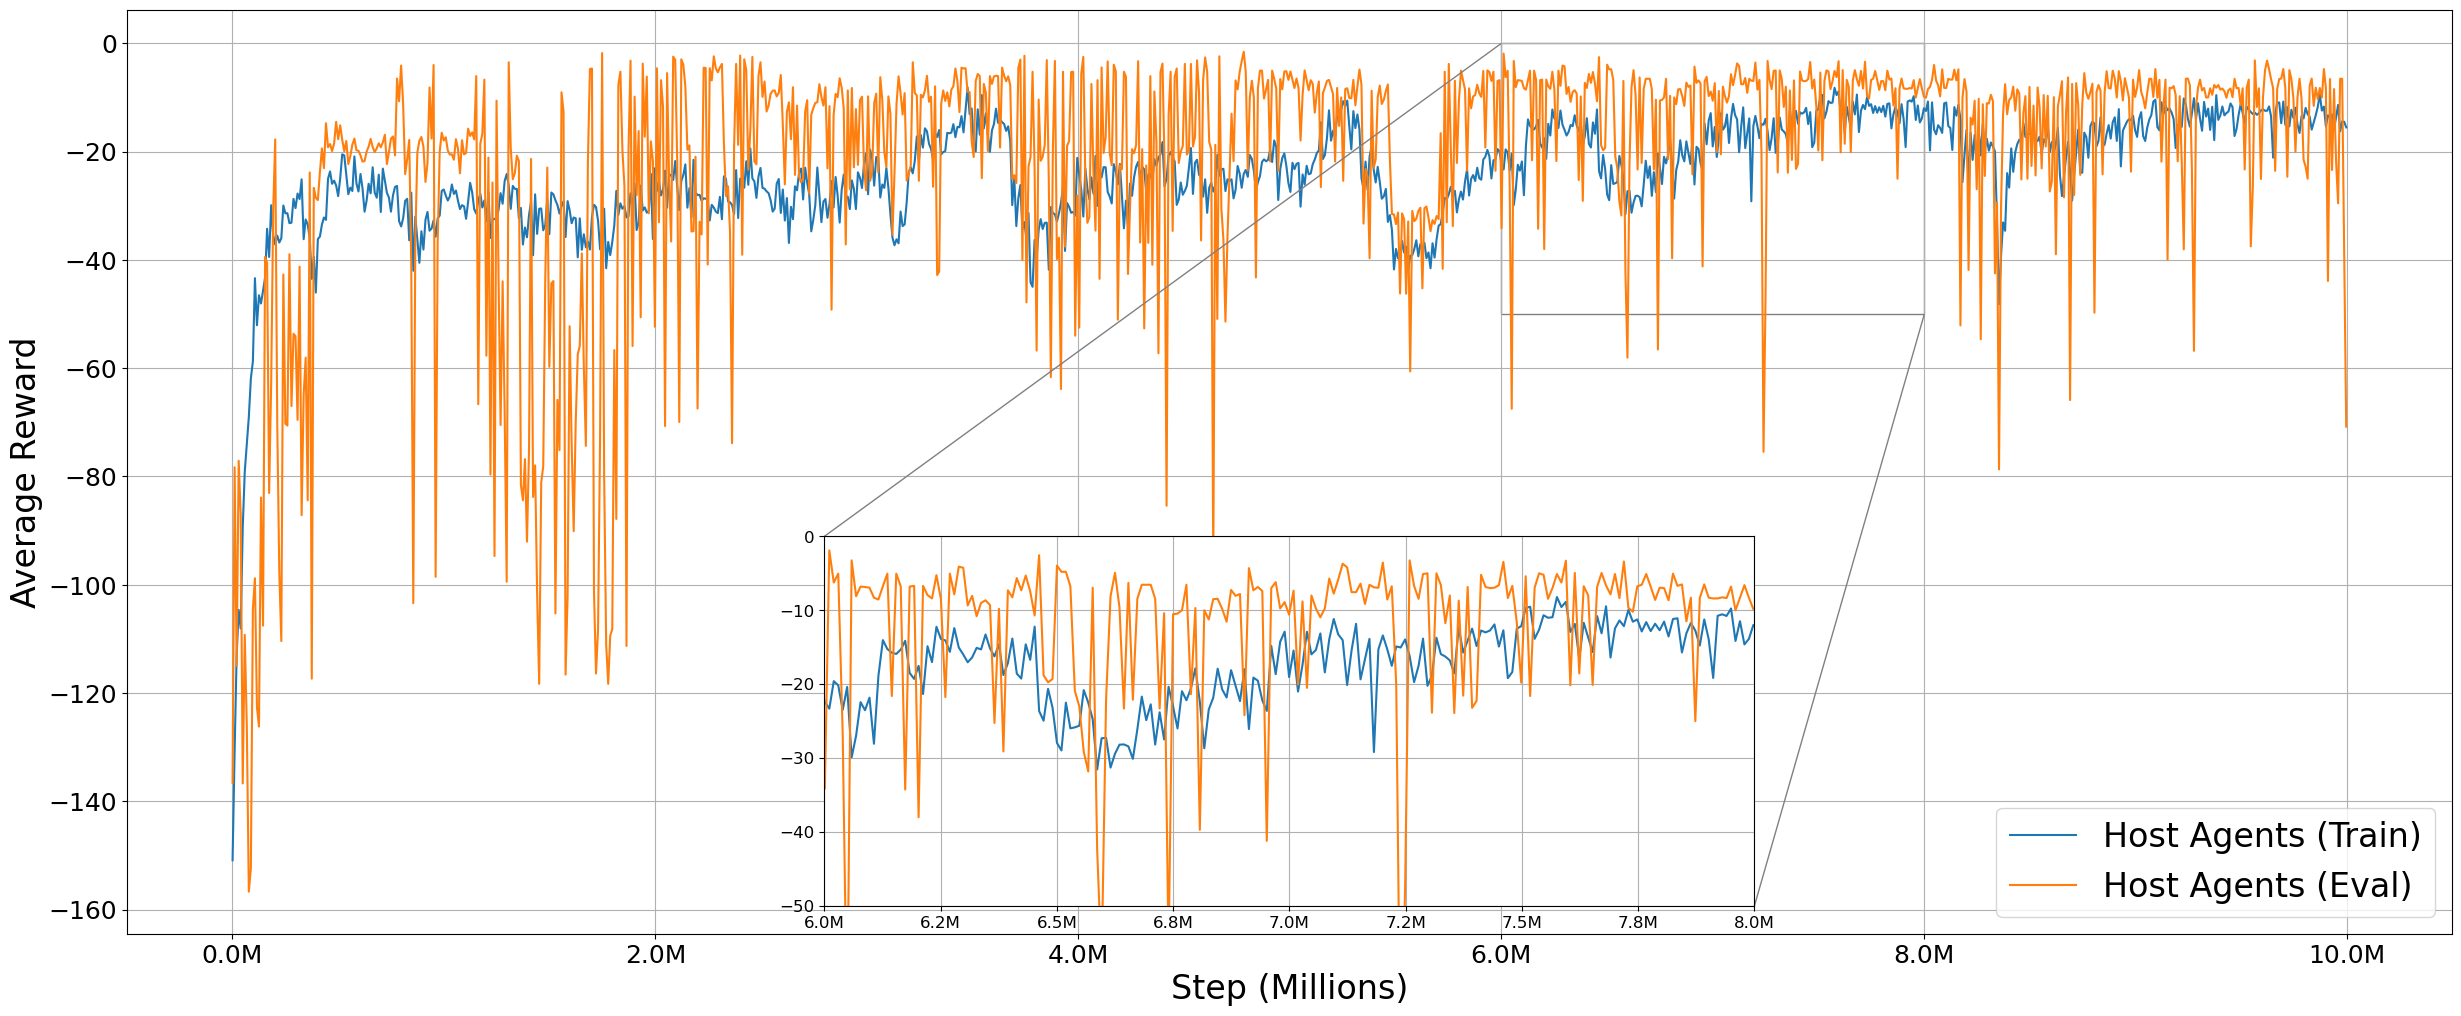

In [33]:
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')

plt.figure(figsize=(30, 12))
ax = plt.gca()
ax.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Host Agents (Train)')
ax.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Host Agents (Eval)')
plt.xlabel('Step (Millions)', fontsize=24)
plt.ylabel('Average Reward', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title('Host Agents Training and Evaluation Rewards')
plt.legend(fontsize=24)
plt.grid(True)

# Format x-axis in millions
ax.xaxis.set_major_formatter(formatter)

x1 = 6e6
x2 = 8e6
ymin = -50
ymax = 0

# Inset axes for zoomed region
axins = inset_axes(ax, width="40%", height="40%", loc='lower center', borderpad=2)
axins.plot(df_host_agents_run['Step'].to_numpy(), df_host_agents_run['Value'].to_numpy(), label='Train')
axins.plot(df_host_agents_eval_run['Step'].to_numpy(), df_host_agents_eval_run['Value'].to_numpy(), label='Eval')
axins.set_xlim(x1, x2)
axins.set_ylim(ymin, ymax)
axins.xaxis.set_major_formatter(formatter)
axins.grid(True)
axins.tick_params(axis='both', labelsize=12)  # Change inset tick fontsize to 12
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [32]:
host_agents_std_reward = []
host_agents_mean_reward = []

host_agents_std_reward.append(df_host_agents_run['Value'].std())
host_agents_mean_reward.append(df_host_agents_run['Value'].mean())

host_agents_std_reward.append(df_host_agents_eval_run['Value'].std())
host_agents_mean_reward.append(df_host_agents_eval_run['Value'].mean())

In [33]:
print("host_agents_mean_reward:", host_agents_mean_reward)
print("host_agents_std_reward:", host_agents_std_reward)

host_agents_mean_reward: [-23.908172399663652, -21.53421337373426]
host_agents_std_reward: [11.26890681703594, 24.047285045902196]


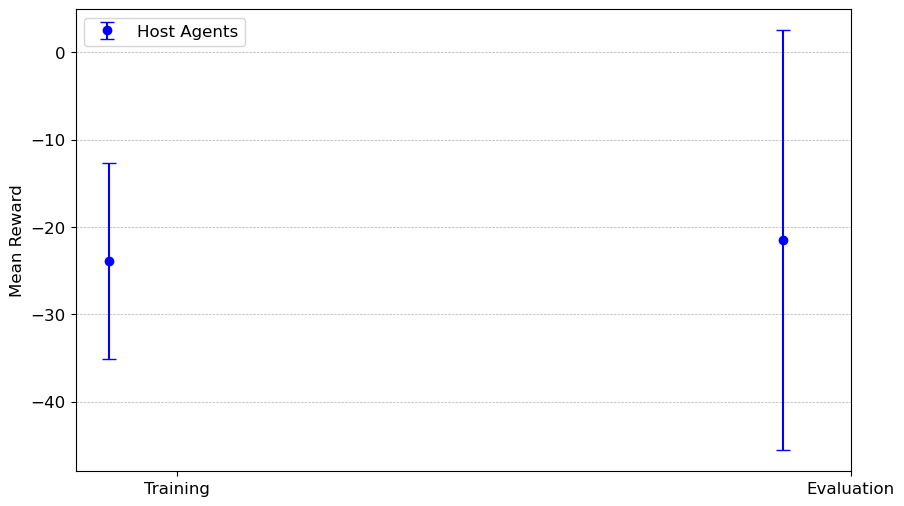

In [34]:
# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, host_agents_mean_reward, yerr=host_agents_std_reward, fmt='o', capsize=5, label='Host Agents', color='blue')

# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()

## Focusing in on model performance after it has been sufficiently trained

Between 6 and 8 million timesteps

In [7]:
# Clip the dataframes to only hold data between 6 and 8 million timesteps
df_host_agents_run = df_host_agents_run[(df_host_agents_run['Step'] >= 6000000) & (df_host_agents_run['Step'] <= 8000000)].reset_index(drop=True)
df_host_agents_eval_run = df_host_agents_eval_run[(df_host_agents_eval_run['Step'] >= 6000000) & (df_host_agents_eval_run['Step'] <= 8000000)].reset_index(drop=True)

In [8]:
host_agents_std_reward = []
host_agents_mean_reward = []

host_agents_std_reward.append(df_host_agents_run['Value'].std())
host_agents_mean_reward.append(df_host_agents_run['Value'].mean())

host_agents_std_reward.append(df_host_agents_eval_run['Value'].std())
host_agents_mean_reward.append(df_host_agents_eval_run['Value'].mean())

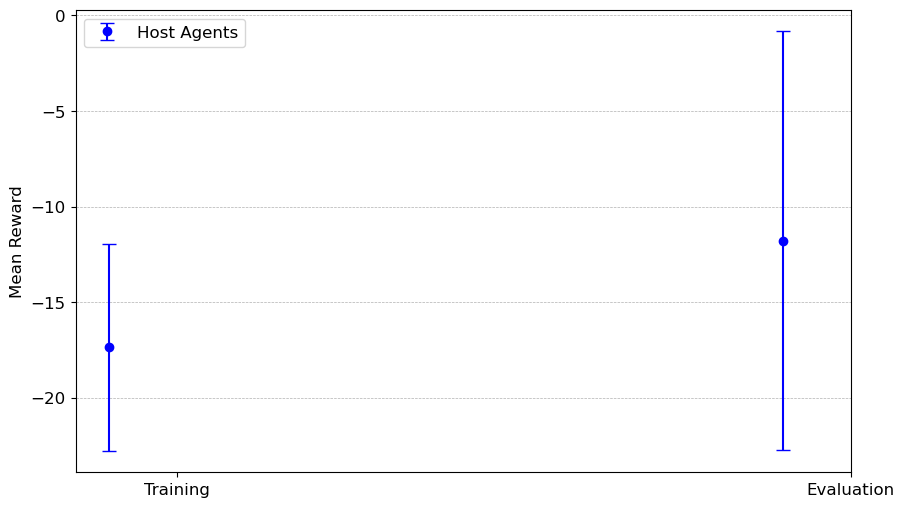

In [9]:
# Define the data

scenarios = ['Training', 'Evaluation']

# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, host_agents_mean_reward, yerr=host_agents_std_reward, fmt='o', capsize=5, label='Host Agents', color='blue')

# Adding labels and title
plt.ylabel('Mean Reward', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()